In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# # Configure global plotting style for data visualization
sns.set_theme(style="whitegrid")
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Load raw dataset from the data/raw directory
file_path = os.path.join('..', 'data', 'raw', 'housing.csv')

# Read CSV file
try:
    df = pd.read_csv(file_path)
    print(f"Data loaded successfully from: {file_path}")
    print(f"Dataset shape: {df.shape} (Rows, Columns)")
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the folder structure!")

# Display first 5 rows
df.head()

Data loaded successfully from: ../data/raw/housing.csv
Dataset shape: (20640, 10) (Rows, Columns)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
print("=== DATASET INFO ===")
df.info()

print("\n=== DESCRIPTIVE STATISTICS ===")
# .describe() provides a quick summary of statistical values (mean, min, max, etc.)
df.describe()

=== DATASET INFO ===
<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.6 MB

=== DESCRIPTIVE STATISTICS ===


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Số lượng giá trị bị thiếu:
 total_bedrooms    207
dtype: int64

Tỷ lệ thiếu của total_bedrooms: 1.00%


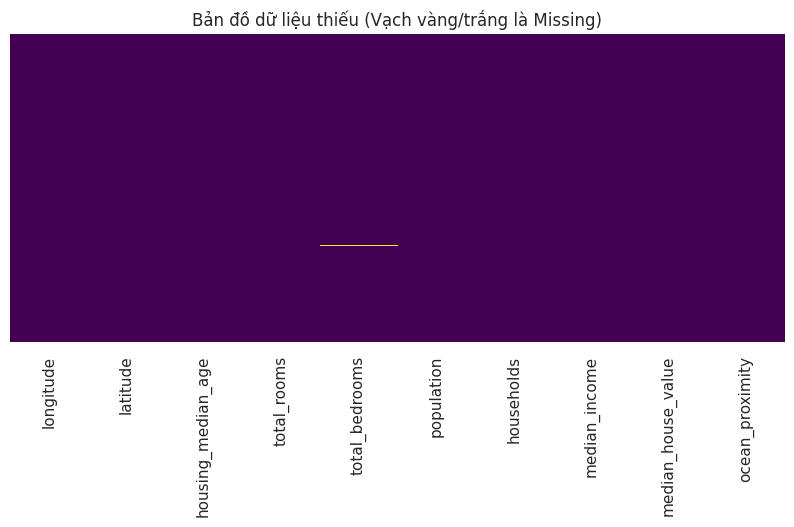

In [5]:
# Đếm số lượng null trong từng cột
missing_values = df.isnull().sum()
print("Số lượng giá trị bị thiếu:\n", missing_values[missing_values > 0])

# Tính tỷ lệ thiếu
percent_missing = (missing_values['total_bedrooms'] / len(df)) * 100
print(f"\nTỷ lệ thiếu của total_bedrooms: {percent_missing:.2f}%")

# Vẽ biểu đồ hiển thị chỗ thiếu (những vạch trắng là chỗ thiếu)
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Bản đồ dữ liệu thiếu (Vạch vàng/trắng là Missing)")
plt.show()

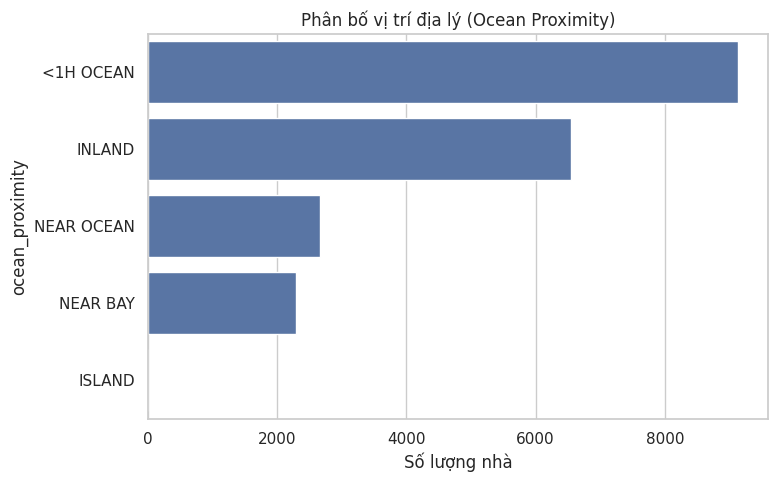

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df['ocean_proximity'], order=df['ocean_proximity'].value_counts().index)
plt.title("Phân bố vị trí địa lý (Ocean Proximity)")
plt.xlabel("Số lượng nhà")
plt.show()

# In chi tiết số lượng
print(df['ocean_proximity'].value_counts())

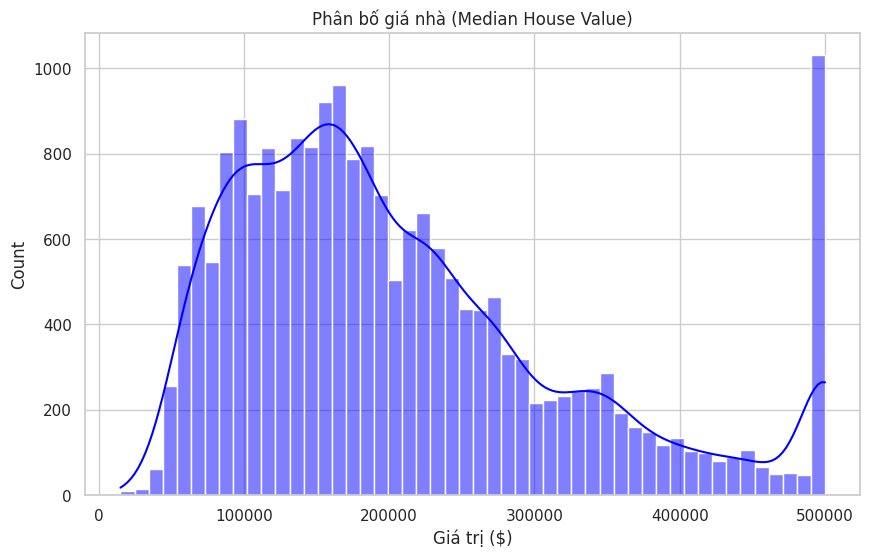

In [7]:
plt.figure(figsize=(10, 6))

# Vẽ histogram
sns.histplot(df['median_house_value'], bins=50, kde=True, color='blue')

plt.title("Phân bố giá nhà (Median House Value)")
plt.xlabel("Giá trị ($)")
plt.show()

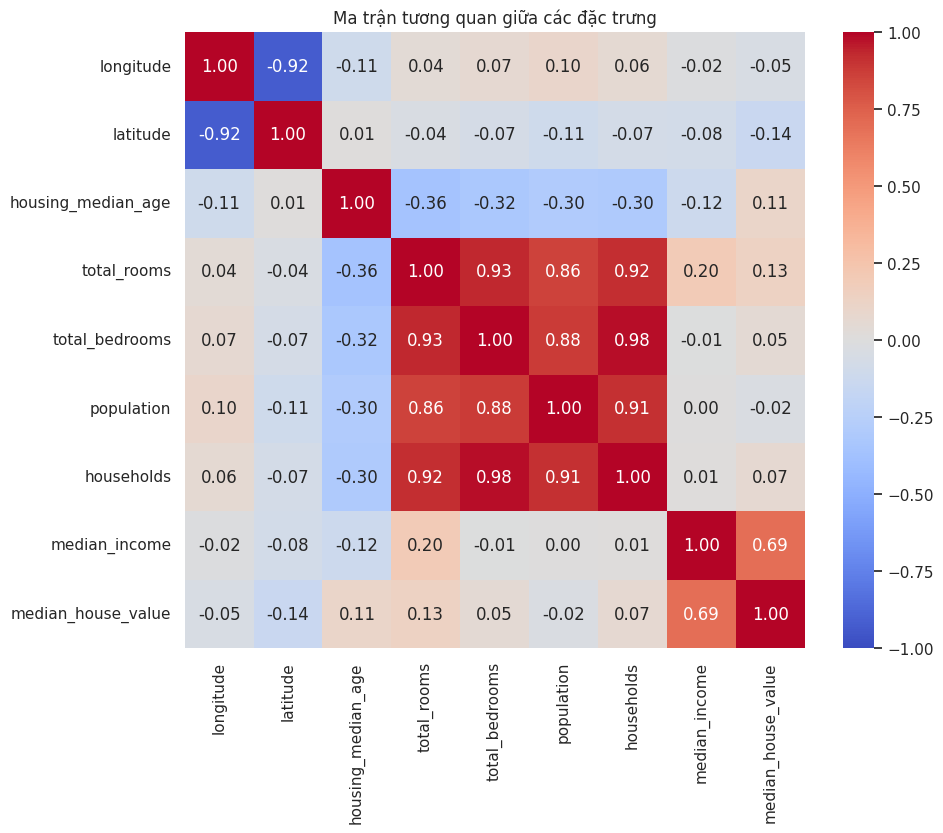

Độ tương quan với Giá nhà:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [8]:
# Chỉ lấy các cột số để tính tương quan
numeric_df = df.select_dtypes(include=[np.number])

# Tính ma trận tương quan
corr_matrix = numeric_df.corr()

# Vẽ Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.show()

# In ra độ tương quan cụ thể với Target
print("Độ tương quan với Giá nhà:")
print(corr_matrix['median_house_value'].sort_values(ascending=False))

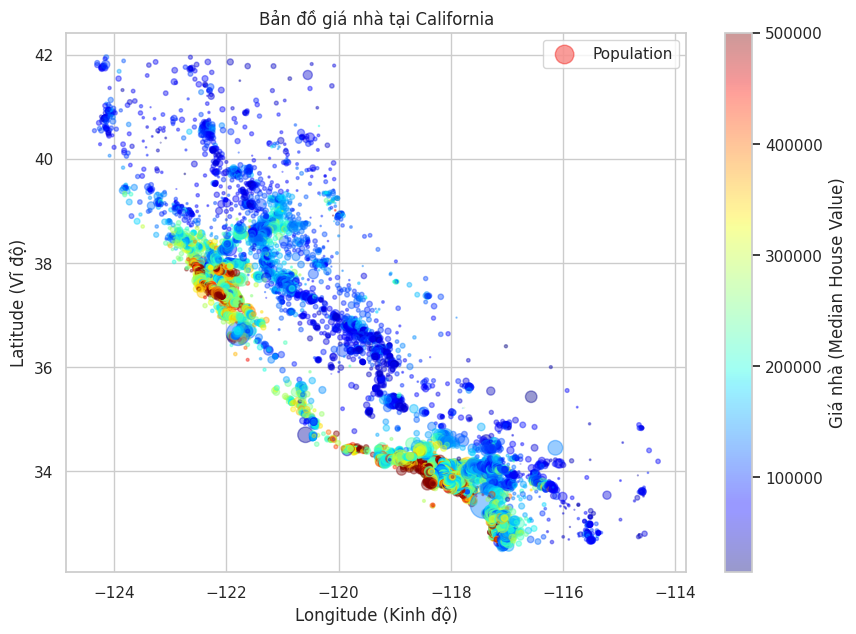

In [9]:
plt.figure(figsize=(10, 7))

# Scatter plot: x=Longitude, y=Latitude
# Alpha: độ trong suốt để thấy mật độ
# C (Color): tô màu theo giá nhà
# S (Size): kích thước điểm theo dân số (chia 100 cho nhỏ bớt)
plt.scatter(df['longitude'], df['latitude'], 
            alpha=0.4, 
            c=df['median_house_value'], 
            s=df['population']/100, 
            cmap='jet', label='Population')

plt.colorbar(label='Giá nhà (Median House Value)')
plt.xlabel("Longitude (Kinh độ)")
plt.ylabel("Latitude (Vĩ độ)")
plt.title("Bản đồ giá nhà tại California")
plt.legend()
plt.show()